In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


## Utilities Clustering

Load the data, set row names (index) to the utilities column (company) and remove it. Convert all columns to `float`

Normalize the dataset

Create a Hierarchal Clustering

Create a kmeans cluster


In [ ]:
from os import utime
utilities_df = pd.read_csv('Utilities.csv')
utilities_df

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


In [ ]:
utilities_df.set_index('Company', inplace=True)
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862


In [ ]:
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044
Florida,1.32,13.5,111.0,60.0,-2.2,11127.0,22.5,1.241
Hawaiian,1.22,12.2,175.0,67.6,2.2,7642.0,0.0,1.652
Idaho,1.10,9.2,245.0,57.0,3.3,13082.0,0.0,0.309
Kentucky,1.34,13.0,168.0,60.4,7.2,8406.0,0.0,0.862


In [ ]:
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()
utilities_df_norm

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.293158,-0.684639,-0.417122,-0.577715,-0.526228,0.045903,-0.714629,-0.853675
Boston,-1.214511,-0.194454,0.821002,0.206836,-0.333812,-1.077764,0.792048,0.813297
Central,1.712141,2.078224,-1.339646,-0.891536,0.051019,0.083931,-0.714629,-0.080431
Commonwealth,-0.509947,0.206607,-0.004414,-0.219063,-0.943128,-0.701706,1.328020,-0.724202
NY,2.037324,-0.862888,0.578233,-1.295019,-0.718643,-1.581428,0.214389,1.692638
Florida,1.115971,1.231540,-1.388200,0.677567,-1.744860,0.623370,0.625301,0.248648
Hawaiian,0.573998,0.652230,0.165525,2.381165,-0.333812,-0.358324,-0.714629,0.987726
Idaho,-0.076369,-0.684639,1.864911,0.005094,0.018950,1.174077,-0.714629,-1.427315
Kentucky,1.224365,1.008728,-0.004414,0.767230,1.269651,-0.143112,-0.714629,-0.432886


In [ ]:
# calculate the distance of each company 像在RF一样，可以计算出每个variable对于sales的影响，哪些是比较重要的
norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']], metric='euclidean')
pd.DataFrame(norm, columns = utilities_df_norm.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,5.214913e-01,2.761745,1.252350
Boston,2.010329,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255e+00,1.100595,1.479261
Central,0.774179,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,8.389668e-01,2.034824,0.510365
Commonwealth,0.758738,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,2.434079e-01,2.547116,1.502093
NY,3.021907,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786e+00,0.952507,2.328691
Florida,1.244422,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123,1.025663,1.722510,...,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417e+00,2.016493,0.313847
Hawaiian,1.885248,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189,1.436822,1.880361,...,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256e+00,0.879934,0.929414
Idaho,1.265638,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,0.000000,1.650417,1.950296,...,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813e+00,3.720421,1.980715
Kentucky,0.461292,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417,0.000000,0.697674,...,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,4.267801e-01,2.308613,0.929141


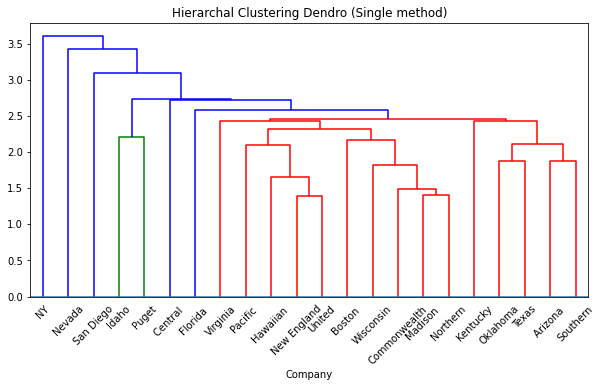

In [ ]:
z = linkage(utilities_df_norm, method='single')

fig =  plt.figure(figsize = (10,10))
fig.subplots_adjust(bottom=0.5)
plt.title('Hierarchal Clustering Dendro (Single method)')
plt.xlabel('Company')
dendrogram(z, labels = utilities_df_norm.index)
plt.axhline()
plt.show()

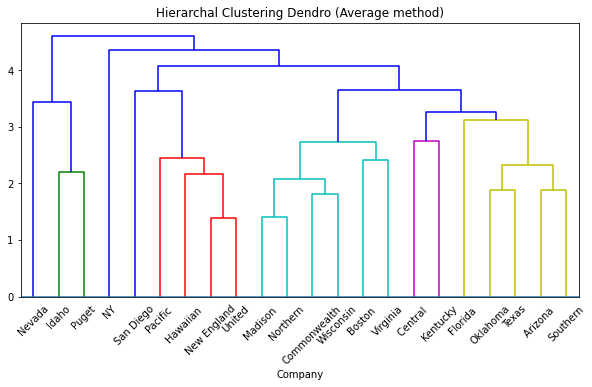

In [ ]:
a = linkage(utilities_df_norm, method='average')

fig =  plt.figure(figsize = (10,10))
fig.subplots_adjust(bottom=0.5)
plt.title('Hierarchal Clustering Dendro (Average method)')
plt.xlabel('Company')
dendrogram(a, labels = utilities_df_norm.index)
plt.axhline()
plt.show()

In [ ]:
mem_min = fcluster(linkage(utilities_df_norm,'single'),6,criterion= 'maxclust')
mem_min = pd.Series(mem_min, index=utilities_df_norm.index)
mem_min

Company
Arizona         2
Boston          2
Central         3
Commonwealth    2
NY              6
Florida         2
Hawaiian        2
Idaho           1
Kentucky        2
Madison         2
Nevada          5
New England     2
Northern        2
Oklahoma        2
Pacific         2
Puget           1
San Diego       4
Southern        2
Texas           2
Wisconsin       2
United          2
Virginia        2
dtype: int32

In [ ]:
mem_avg = fcluster(linkage(utilities_df_norm,'average'),6,criterion= 'maxclust')
mem_avg = pd.Series(mem_min, index=utilities_df_norm.index)
mem_avg

Company
Arizona         2
Boston          2
Central         3
Commonwealth    2
NY              6
Florida         2
Hawaiian        2
Idaho           1
Kentucky        2
Madison         2
Nevada          5
New England     2
Northern        2
Oklahoma        2
Pacific         2
Puget           1
San Diego       4
Southern        2
Texas           2
Wisconsin       2
United          2
Virginia        2
dtype: int32

In [ ]:
from google.colab import files
mem.min.to_csv('')
files.download('')

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)
kmeans

KMeans(n_clusters=6, random_state=0)

In [ ]:
elbow = []
for n_clusters in range (1,7):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
  elbow.append(kmeans.inertia_ / n_clusters)
elbows = pd.DataFrame({'n_clusters':range(1,7),'inertia': elbow})
elbows

,n_clusters,inertia
0,1,168.000000
1,2,65.601052
2,3,33.903552
3,4,20.350914
4,5,13.481272
5,6,10.049341


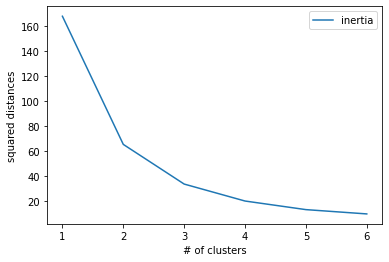

In [ ]:
ax=elbows.plot(x='n_clusters', y='inertia')
plt.xlabel('# of clusters')
plt.ylabel('squared distances')
plt.show()

In [ ]:
mem_k = pd.Series(kmeans.labels_,index=utilities_df_norm.index)
mem_k

Company
Arizona         2
Boston          1
Central         2
Commonwealth    0
NY              3
Florida         2
Hawaiian        1
Idaho           5
Kentucky        2
Madison         0
Nevada          4
New England     1
Northern        0
Oklahoma        2
Pacific         1
Puget           5
San Diego       1
Southern        2
Texas           2
Wisconsin       0
United          1
Virginia        0
dtype: int32